<div style="text-align: center;"><div  style="color:#2B00FF; font-size:30px; font-weight:bold; line-height:40px;">IMS Proschool - BA Project 1</div></div>

<div style="text-align: center; color:#006666"><strong>By: </strong>Parikshit Koya</div>
<div style="text-align: center; color:#006666"><strong>Mail ID: </strong>parikshit.koya@gmail.com</div>

### Importing Libraries

In [37]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import style
import seaborn as sns

# Algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Missing Data

In [6]:
total = df.isnull().sum().sort_values(ascending=False)
percent_1 = df.isnull().sum()/df.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(3)

,Total,%
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2


<div style="text-align: left; color:#000000">As we can see from the above table that <strong>Cabin</strong>, <strong>Age</strong> and <strong>Embarked</strong> are the only variables where there is any missing data</div>
<br>
<div style="text-align: left; color:#000000">This is visualised in below plot</div>

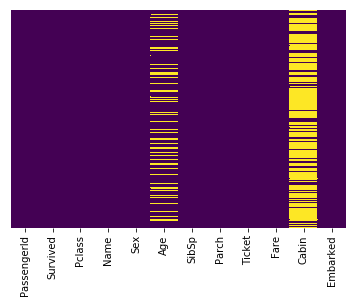

In [7]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

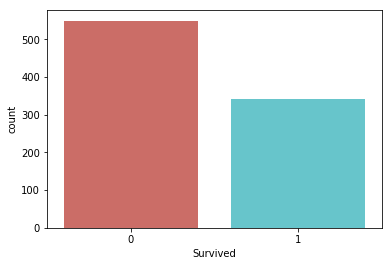

In [8]:
sns.countplot(x='Survived',data=df,palette='hls')

<div style="text-align: left; color:#000000">Checking the ratio of passangers that <strong>Survived</strong></div>

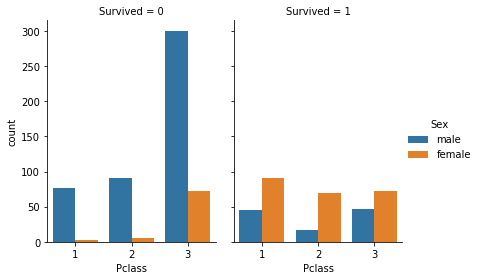

In [9]:
g = sns.catplot(x='Pclass', hue='Sex', col='Survived',data=df, kind='count',height=4, aspect=.7)

- <div style="text-align: left; color:#000000">Data indicates that of those who survived, survivors were predominantly females across all the classes.</div>
- <div style="text-align: left; color:#000000">Those who perished were predominantly males across all the classes barring 3rd Class, where there was significant number of fatalities for female though the same among males was much higher.</div>

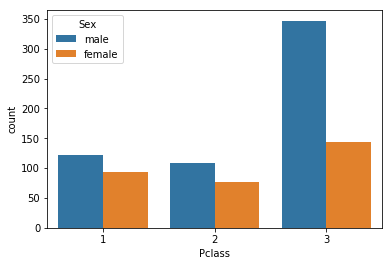

In [10]:
ax = sns.countplot(x='Pclass', hue='Sex', data=df)

<div style="text-align: left; color:#000000">Indicating the ratio of males compared to females across three classes.</div>
<div style="text-align: left; color:#000000">Ratio of males to females is only slightly higher for all classes, barring the 3rd Class where the ratio of males is significantly higher.</div>

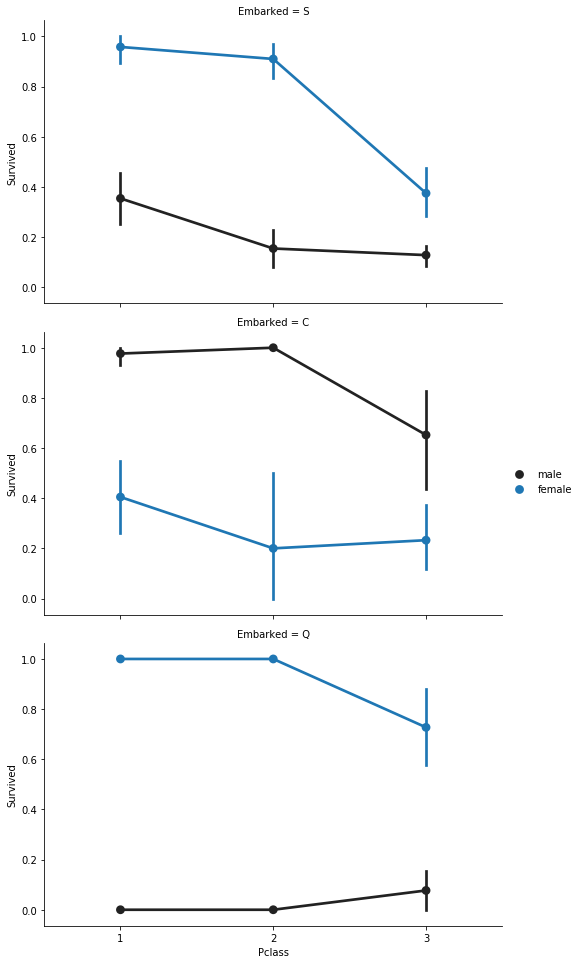

In [11]:
FacetGrid = sns.FacetGrid(df, row='Embarked', size=4.5, aspect=1.6)
FacetGrid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette=None,  order=None, hue_order=None )
FacetGrid.add_legend()

<div style="text-align: left; color:#000000">Embarked seems to be correlated with survival, depending on the gender.</div>
<div style="text-align: left; color:#000000">Women who embarked at <strong>Q</strong> and port <strong>S</strong> have a higher chance of survival. The inverse is true, if they embarked at port <strong>C</strong>. Men have a high survival probability if they are on port <strong>C</strong>, but a low probability if they are on port <strong>Q</strong> or <strong>S</strong>.</div>

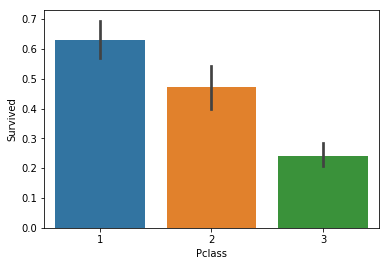

In [12]:
sns.barplot(x='Pclass', y='Survived', data=df)

Here we see clearly, that Pclass is contributing to a persons chance of survival, especially if this person is in class 1. We will create another pclass plot below.

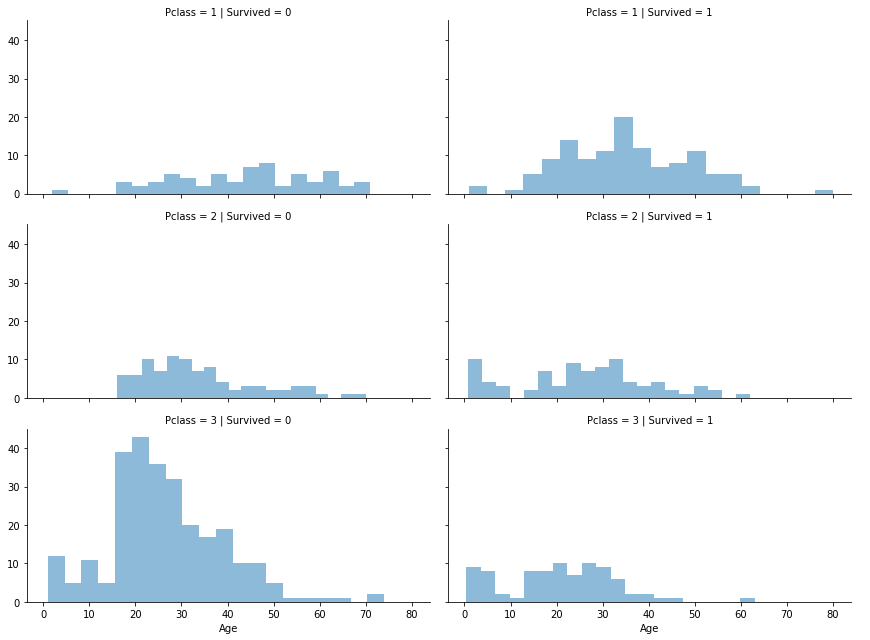

In [13]:
grid = sns.FacetGrid(df, col='Survived', row='Pclass', size=3, aspect=2)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

The plot above confirms our assumption about pclass 1, but we can also spot a high probability that a person in pclass 3 will not survive.

SibSp and Parch would make more sense as a combined feature that shows the total number of relatives, a person has on the Titanic.

In [14]:
df['relatives'] = df['SibSp'] + df['Parch']
df.loc[df['relatives'] > 0, 'not_alone'] = 0
df.loc[df['relatives'] == 0, 'not_alone'] = 1
df['not_alone'] = df['not_alone'].astype(int)
df['not_alone'].value_counts()


1    537
0    354
Name: not_alone, dtype: int64

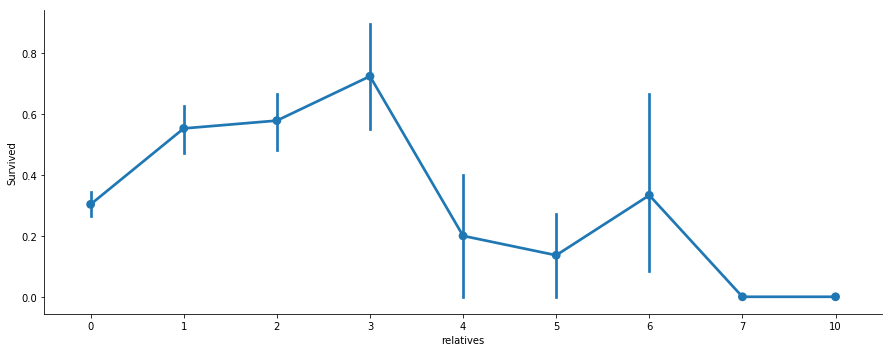

In [15]:
axes = sns.factorplot('relatives','Survived', 
                      data = df, aspect = 2.5, )

Here we can see that you had a high probabilty of survival with 1 to 3 realitves, but a lower one if you had less than 1 or more than 3 (except for some cases with 6 relatives).

In [16]:
df['Embarked'].mode()

0    S
dtype: object

In [17]:
#df['Embarked'][df['Embarked'].isna()==True]=df['Embarked'].mode()
df['Embarked'][df['Embarked'].isna()==True]='S' #Since above command didnt work, manually imputed value as 'S'

<div>Replacing the two missing values in <strong>Embarked</strong> with mode</div>

In [18]:
df['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [19]:
df['Embarked'].value_counts().sum()

891

<div>Missing values imputed for <strong>Embarked</strong></div>

Since <strong>Ticket</strong> is unique identifiers, we will drop it from the dataset.
Model might also consider <strong>PassengerId</strong> to be a variable so we will drop it from the dataset as well.
Since <strong>Cabin</strong> has a lot of missing values, we will drop that from the dataset too.

In [20]:
df = df.drop(['PassengerId', 'Ticket','Cabin'], axis=1)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
Survived     891 non-null int64
Pclass       891 non-null int64
Name         891 non-null object
Sex          891 non-null object
Age          714 non-null float64
SibSp        891 non-null int64
Parch        891 non-null int64
Fare         891 non-null float64
Embarked     891 non-null object
relatives    891 non-null int64
not_alone    891 non-null int32
dtypes: float64(2), int32(1), int64(5), object(3)
memory usage: 73.2+ KB


<div>Missing values in <strong>Age</strong> are yet to be imputed</div>

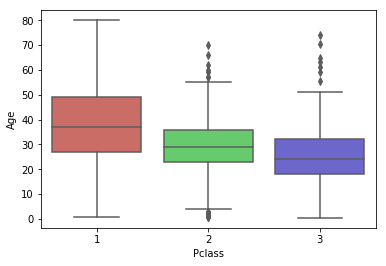

In [22]:
sns.boxplot(x='Pclass',y='Age',data=df,palette='hls')

<div>Looking at the distribution of the <strong>Age</strong> of passengers by class.</div>
<br>
You can also see the mean <strong>Age</strong> of the passengers by <strong>Class</strong> based on weather they survived or not.

In [23]:
print(np.mean(df.Age[(df.Pclass==1)&(df.Survived==0)]))
print(np.mean(df.Age[(df.Pclass==2)&(df.Survived==0)]))
print(np.mean(df.Age[(df.Pclass==3)&(df.Survived==0)]))
print(np.mean(df.Age[(df.Pclass==1)&(df.Survived==1)]))
print(np.mean(df.Age[(df.Pclass==2)&(df.Survived==1)]))
print(np.mean(df.Age[(df.Pclass==3)&(df.Survived==1)]))

43.6953125
33.544444444444444
26.555555555555557
35.36819672131148
25.90156626506024
20.646117647058823


Looing at the <strong>Age</strong> distribution of passengers survived vs not survived by <strong>Sex</strong>

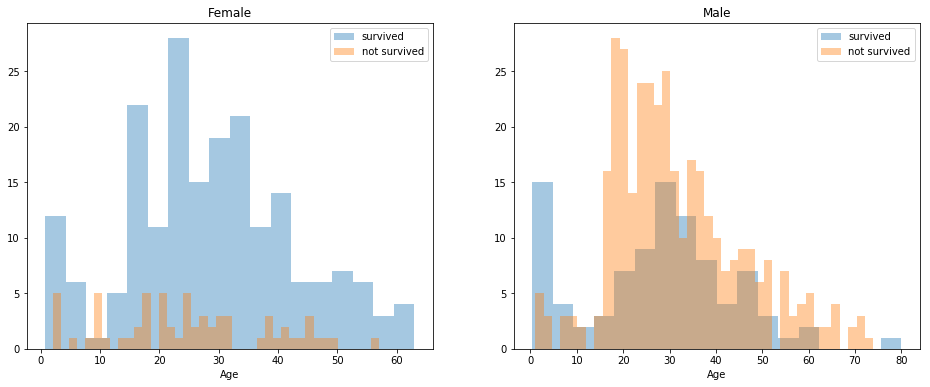

In [24]:
survived = 'survived'
not_survived = 'not survived'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(16, 6))
women = df[df['Sex']=='female']
men = df[df['Sex']=='male']
ax = sns.distplot(women[women['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[0], kde =False)
ax = sns.distplot(women[women['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[0], kde =False)
ax.legend()
ax.set_title('Female')
ax = sns.distplot(men[men['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[1], kde = False)
ax = sns.distplot(men[men['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[1], kde = False)
ax.legend()
_ = ax.set_title('Male')

In [25]:
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,1,0
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,0,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,1,0
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,0,1
5,0,3,"Moran, Mr. James",male,NaN,0,0,8.4583,Q,0,1
6,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,51.8625,S,0,1
7,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,21.0750,S,4,0
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,11.1333,S,2,0
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,30.0708,C,1,0


In [26]:
mean = df["Age"].mean()
std = df["Age"].std()
is_null = df["Age"].isnull().sum()
# compute random numbers between the mean, std and is_null
rand_age = np.random.randint(mean - std, mean + std, size = is_null)
# fill NaN values in Age column with random values generated
age_slice = df["Age"].copy()
age_slice[np.isnan(age_slice)] = rand_age
df["Age"] = age_slice
df["Age"] = df["Age"].astype(int)
df["Age"].isnull().sum()

0

Changing the <strong>Sex</strong> to binary

In [27]:
genders = {"male": 1, "female": 0}
df['Sex'] = df['Sex'].map(genders)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone
0,0,3,"Braund, Mr. Owen Harris",1,22,1,0,7.2500,S,1,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38,1,0,71.2833,C,1,0
2,1,3,"Heikkinen, Miss. Laina",0,26,0,0,7.9250,S,0,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35,1,0,53.1000,S,1,0
4,0,3,"Allen, Mr. William Henry",1,35,0,0,8.0500,S,0,1


Converting <strong>Embarked</strong> to numberic

In [28]:
ports = {"S": 0, "C": 1, "Q": 2}
df['Embarked'] = df['Embarked'].map(ports)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
Survived     891 non-null int64
Pclass       891 non-null int64
Name         891 non-null object
Sex          891 non-null int64
Age          891 non-null int32
SibSp        891 non-null int64
Parch        891 non-null int64
Fare         891 non-null float64
Embarked     891 non-null int64
relatives    891 non-null int64
not_alone    891 non-null int32
dtypes: float64(1), int32(2), int64(7), object(1)
memory usage: 69.7+ KB


In [30]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone
0,0,3,"Braund, Mr. Owen Harris",1,22,1,0,7.2500,0,1,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38,1,0,71.2833,1,1,0
2,1,3,"Heikkinen, Miss. Laina",0,26,0,0,7.9250,0,0,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35,1,0,53.1000,0,1,0
4,0,3,"Allen, Mr. William Henry",1,35,0,0,8.0500,0,0,1


Creating a new feature called <strong>Title</strong> and removing the <strong>Name<strong> variable.

In [31]:
titles = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}

df['Title'] = df.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
# replace titles with a more common title or as Rare
df['Title'] = df['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr',\
                                    'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
df['Title'] = df['Title'].replace('Mlle', 'Miss')
df['Title'] = df['Title'].replace('Ms', 'Miss')
df['Title'] = df['Title'].replace('Mme', 'Mrs')
# convert titles into numbers
df['Title'] = df['Title'].map(titles)
# filling NaN with 0, to get safe
df['Title'] = df['Title'].fillna(0)
df = df.drop(['Name'], axis=1)


Grouping or Bucketing the fares paid by passengers

In [33]:
df['Fare'] = df['Fare'].astype(int)
df.loc[ df['Fare'] <= 7.91, 'Fare'] = 0
df.loc[(df['Fare'] > 7.91) & (df['Fare'] <= 14.454), 'Fare'] = 1
df.loc[(df['Fare'] > 14.454) & (df['Fare'] <= 31), 'Fare']   = 2
df.loc[(df['Fare'] > 31) & (df['Fare'] <= 99), 'Fare']   = 3
df.loc[(df['Fare'] > 99) & (df['Fare'] <= 250), 'Fare']   = 4
df.loc[ df['Fare'] > 250, 'Fare'] = 5

Looking at the correlation between various variables

In [34]:
df.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Title
Survived,1.000000,-0.338481,-0.543351,-0.054690,-0.035322,0.081629,0.312249,0.106811,0.016639,-0.203367,0.407753
Pclass,-0.338481,1.000000,0.131900,-0.324210,0.083081,0.018443,-0.681035,0.045702,0.065997,0.135207,-0.173929
Sex,-0.543351,0.131900,1.000000,0.066259,-0.114631,-0.245489,-0.245782,-0.116569,-0.200988,0.303646,-0.502713
Age,-0.054690,-0.324210,0.066259,1.000000,-0.238251,-0.172444,0.085470,0.008303,-0.248986,0.167279,-0.070944
SibSp,-0.035322,0.083081,-0.114631,-0.238251,1.000000,0.414838,0.342377,-0.059961,0.890712,-0.584471,0.269623
Parch,0.081629,0.018443,-0.245489,-0.172444,0.414838,1.000000,0.369094,-0.078665,0.783111,-0.583398,0.315784
Fare,0.312249,-0.681035,-0.245782,0.085470,0.342377,0.369094,1.000000,-0.055693,0.418396,-0.526320,0.313595
Embarked,0.106811,0.045702,-0.116569,0.008303,-0.059961,-0.078665,-0.055693,1.000000,-0.080281,0.017807,0.045400
relatives,0.016639,0.065997,-0.200988,-0.248986,0.890712,0.783111,0.418396,-0.080281,1.000000,-0.690922,0.342039
not_alone,-0.203367,0.135207,0.303646,0.167279,-0.584471,-0.583398,-0.526320,0.017807,-0.690922,1.000000,-0.405813


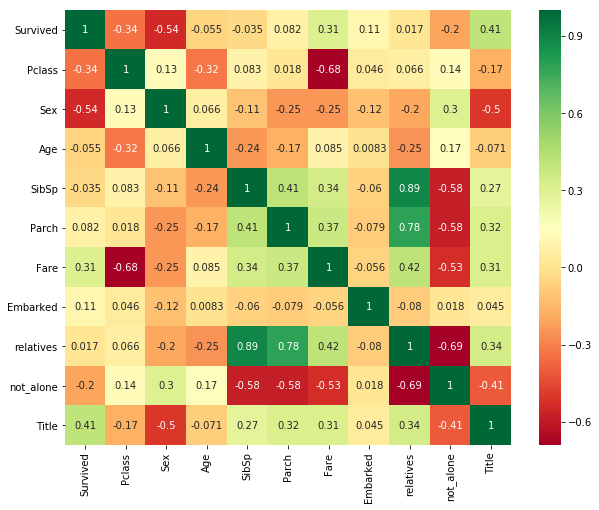

In [35]:
plt.subplots(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="RdYlGn")
plt.show()

In [36]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Title
0,0,3,1,22,1,0,0,0,1,0,1
1,1,1,0,38,1,0,3,1,1,0,3
2,1,3,0,26,0,0,0,0,0,1,2
3,1,1,0,35,1,0,3,0,1,0,3
4,0,3,1,35,0,0,1,0,0,1,1


## Building the Model

In [38]:
X = df.drop('Survived',axis=1)
y = df['Survived']

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

### Logistic Regression:

In [40]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

Y_pred = logreg.predict(X_test)

acc_log = round(logreg.score(X_train, y_train) * 100, 2)

### K Nearest Neighbor:

In [43]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, y_train) * 100, 2)


### Decision Tree

In [44]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, y_train) * 100, 2)

### Random Forest:

In [48]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, y_train)
acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)

## Comparing the models:

In [49]:
results = pd.DataFrame({
    'Model': ['Logistic Regression','KNN', 'Decision Tree', 'Random Forest'],
    'Score': [acc_log, acc_knn, acc_decision_tree, acc_random_forest]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head()

,Model
Score,
96.15,Decision Tree
96.15,Random Forest
86.52,KNN
80.26,Logistic Regression


## Confusion Matrix:

In [50]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
predictions = cross_val_predict(random_forest, X_train, y_train, cv=3)
confusion_matrix(y_train, predictions)

array([[306,  67],
       [ 70, 180]], dtype=int64)

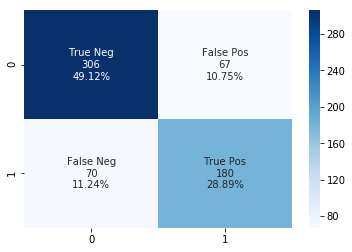

In [56]:
names = ['True Neg','False Pos','False Neg','True Pos']
counts = ["{0:0.0f}".format(value) for value in confusion_matrix(y_train, predictions).flatten()]
percentages = ["{0:.2%}".format(value) for value in confusion_matrix(y_train, predictions).flatten()/np.sum(confusion_matrix(y_train, predictions))]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(names,counts,percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(confusion_matrix(y_train, predictions), annot=labels, fmt='', cmap='Blues')

<div>First row talks about 306 passengers were correctly classified as not survived and 67 were wrongly classified as not survived</div>
<div>Second row talks about 70 passengers were wrongly classified as not survived and 180 were correctly classified as survived</div>

## Precision and Recall:

In [57]:
from sklearn.metrics import precision_score, recall_score

print("Precision:", precision_score(y_train, predictions))
print("Recall:",recall_score(y_train, predictions))

Precision: 0.728744939271255
Recall: 0.72


# F-Score:

In [59]:
from sklearn.metrics import f1_score
f1_score(y_train, predictions)

0.7243460764587525